In [1]:
# загружаем библиотеки
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
!pip install odfpy


     |████████████████████████████████| 717 kB 14.0 MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160692 sha256=ea0b4ec21af8c649a3df7de69571852d668695ce7444bcf4975e9afc8e051a82
  Stored in directory: /root/.cache/pip/wheels/e2/f4/5d/a68c656235d33455a1d0f78e877acddfa006907a6d52d7e6ee
Successfully built odfpy


In [2]:
# загружаем датасет
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving X_bp.xlsx to X_bp.xlsx
Saving X_nup.xlsx to X_nup.xlsx
User uploaded file "X_bp.xlsx" with length 186865 bytes
User uploaded file "X_nup.xlsx" with length 52788 bytes


In [3]:
data_bp = pd.read_excel('X_bp.xlsx', index_col=0)
data_nup = pd.read_excel('X_nup.xlsx', index_col=0)

In [4]:
df = data_bp.merge(data_nup, left_index=True, right_index=True, how='inner')

In [5]:
dfc = df.copy()

In [6]:
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [7]:
#Проверяем датасет на пропуски, дубликаты и типы данных
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

0

In [8]:
#Заносим названия столбцов
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Соотношение матрица-наполнитель


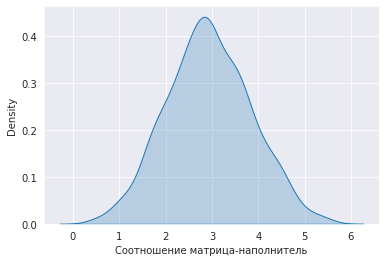

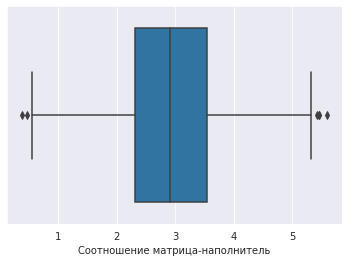

Минимальное значение:  0.389402605178414
Максимальное значение:  5.59174159869754
Среднее значение:  2.9303657734325506
Медианное значение:  2.90687765033521



Плотность, кг/м3


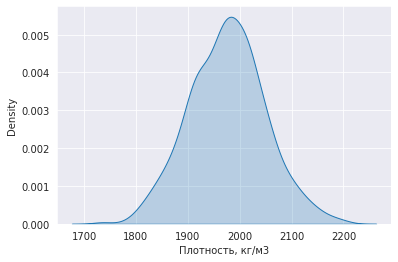

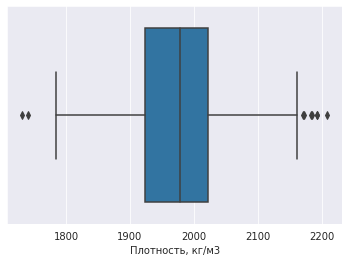

Минимальное значение:  1731.764635096
Максимальное значение:  2207.77348061119
Среднее значение:  1975.7348881101548
Медианное значение:  1977.62165679058



модуль упругости, ГПа


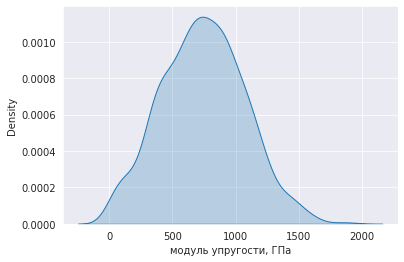

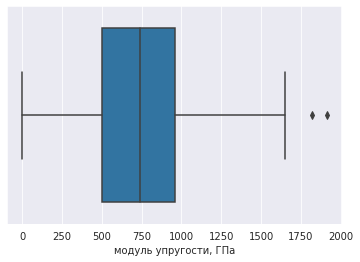

Минимальное значение:  2.4369087535075
Максимальное значение:  1911.53647700054
Среднее значение:  739.9232327560719
Медианное значение:  739.664327697792



Количество отвердителя, м.%


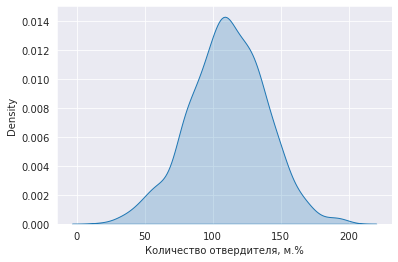

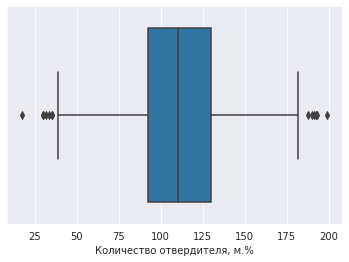

Минимальное значение:  17.7402745562519
Максимальное значение:  198.953207190451
Среднее значение:  110.57076864736258
Медианное значение:  110.564839894065



Содержание эпоксидных групп,%_2


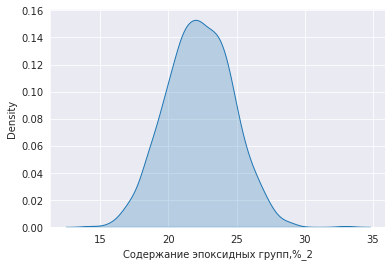

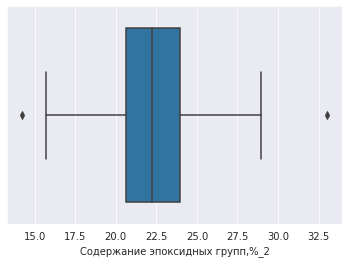

Минимальное значение:  14.2549854977161
Максимальное значение:  33.0
Среднее значение:  22.24438954776772
Медианное значение:  22.2307437560244



Температура вспышки, С_2


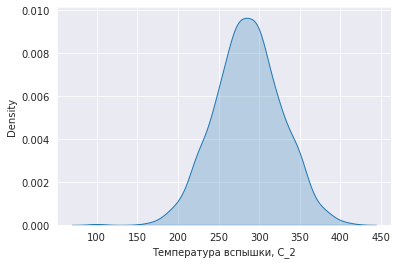

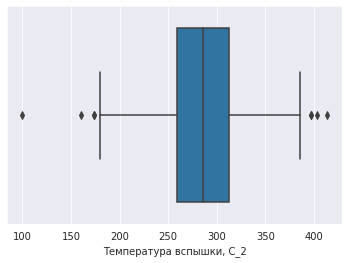

Минимальное значение:  100.0
Максимальное значение:  413.273418243566
Среднее значение:  285.88215135162227
Медианное значение:  285.896812331237



Поверхностная плотность, г/м2


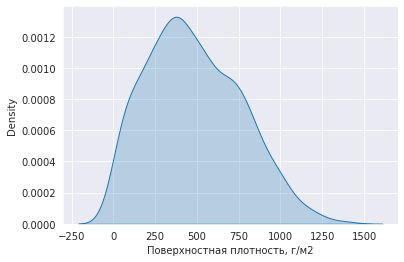

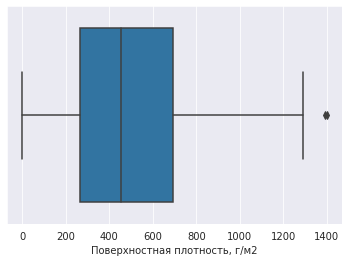

Минимальное значение:  0.603739925153945
Максимальное значение:  1399.54236233989
Среднее значение:  482.7318330384181
Медианное значение:  451.86436518306



Модуль упругости при растяжении, ГПа


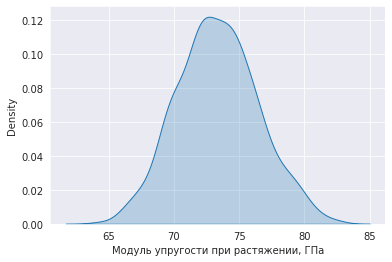

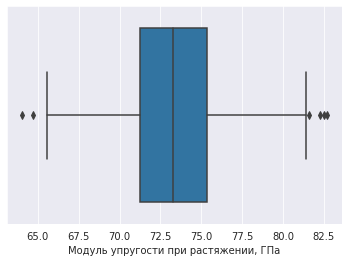

Минимальное значение:  64.0540605597917
Максимальное значение:  82.682051035271
Среднее значение:  73.32857125009073
Медианное значение:  73.2688045943481



Прочность при растяжении, МПа


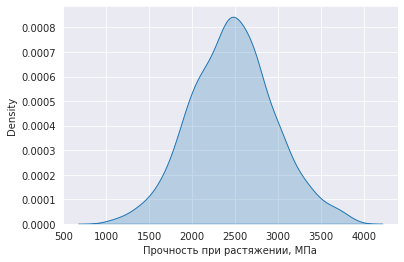

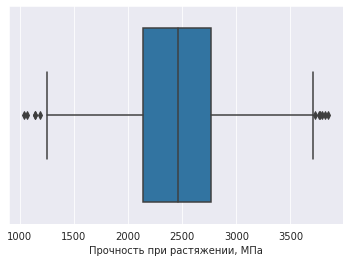

Минимальное значение:  1036.85660535
Максимальное значение:  3848.43673187618
Среднее значение:  2466.9228426979025
Медианное значение:  2459.52452600309



Потребление смолы, г/м2


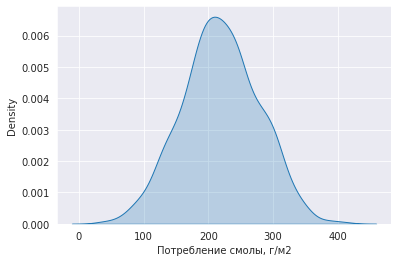

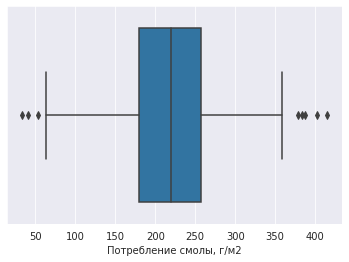

Минимальное значение:  33.8030255329625
Максимальное значение:  414.590628361534
Среднее значение:  218.42314367654265
Медианное значение:  219.198882195134



Угол нашивки, град


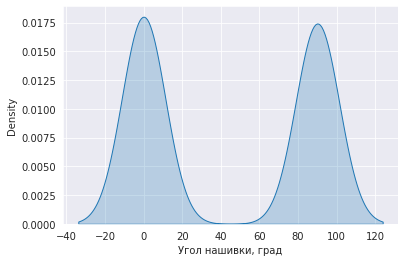

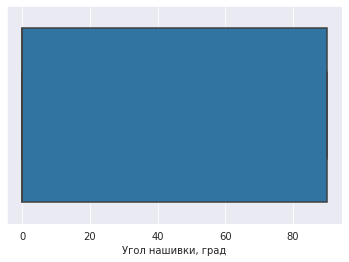

Минимальное значение:  0
Максимальное значение:  90
Среднее значение:  44.252199413489734
Медианное значение:  0.0



Шаг нашивки


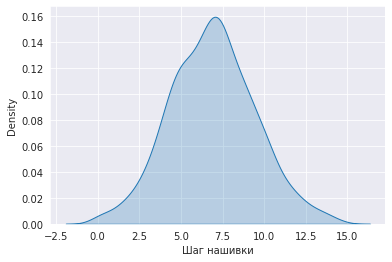

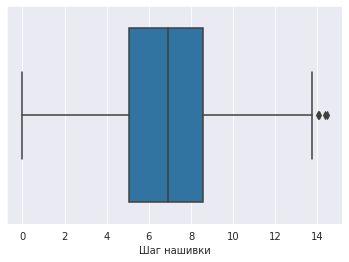

Минимальное значение:  0.0
Максимальное значение:  14.4405218753969
Среднее значение:  6.899222077675024
Медианное значение:  6.9161438559491



Плотность нашивки


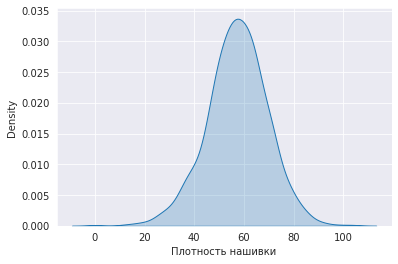

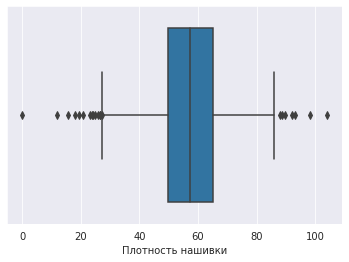

Минимальное значение:  0.0
Максимальное значение:  103.988901301494
Среднее значение:  57.15392943285763
Медианное значение:  57.3419198469929





In [9]:
#Проводим разведочный анализ необработанных данных (без нормализации и исключения шумов)
for colname in df.columns:
    print(colname)
    #Гистограмма распределения
    sub_data = df[colname]
    sns.set_style("darkgrid")
    sns.kdeplot(data=sub_data,shade=True, palette='colorblind')
    plt.show()
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=sub_data);
    plt.show()
    #Минимальное значение
    print("Минимальное значение: ", end=" ")
    print(min(sub_data))
    #Среднее значение
    print("Максимальное значение: ", end=" ")
    print(max(sub_data))
    #Среднее значение
    print("Среднее значение: ", end=" ")
    print(np.mean(sub_data))
    #Медианное значение
    print("Медианное значение: ", end=" ")
    print(np.median(sub_data))
    print("\n\n")

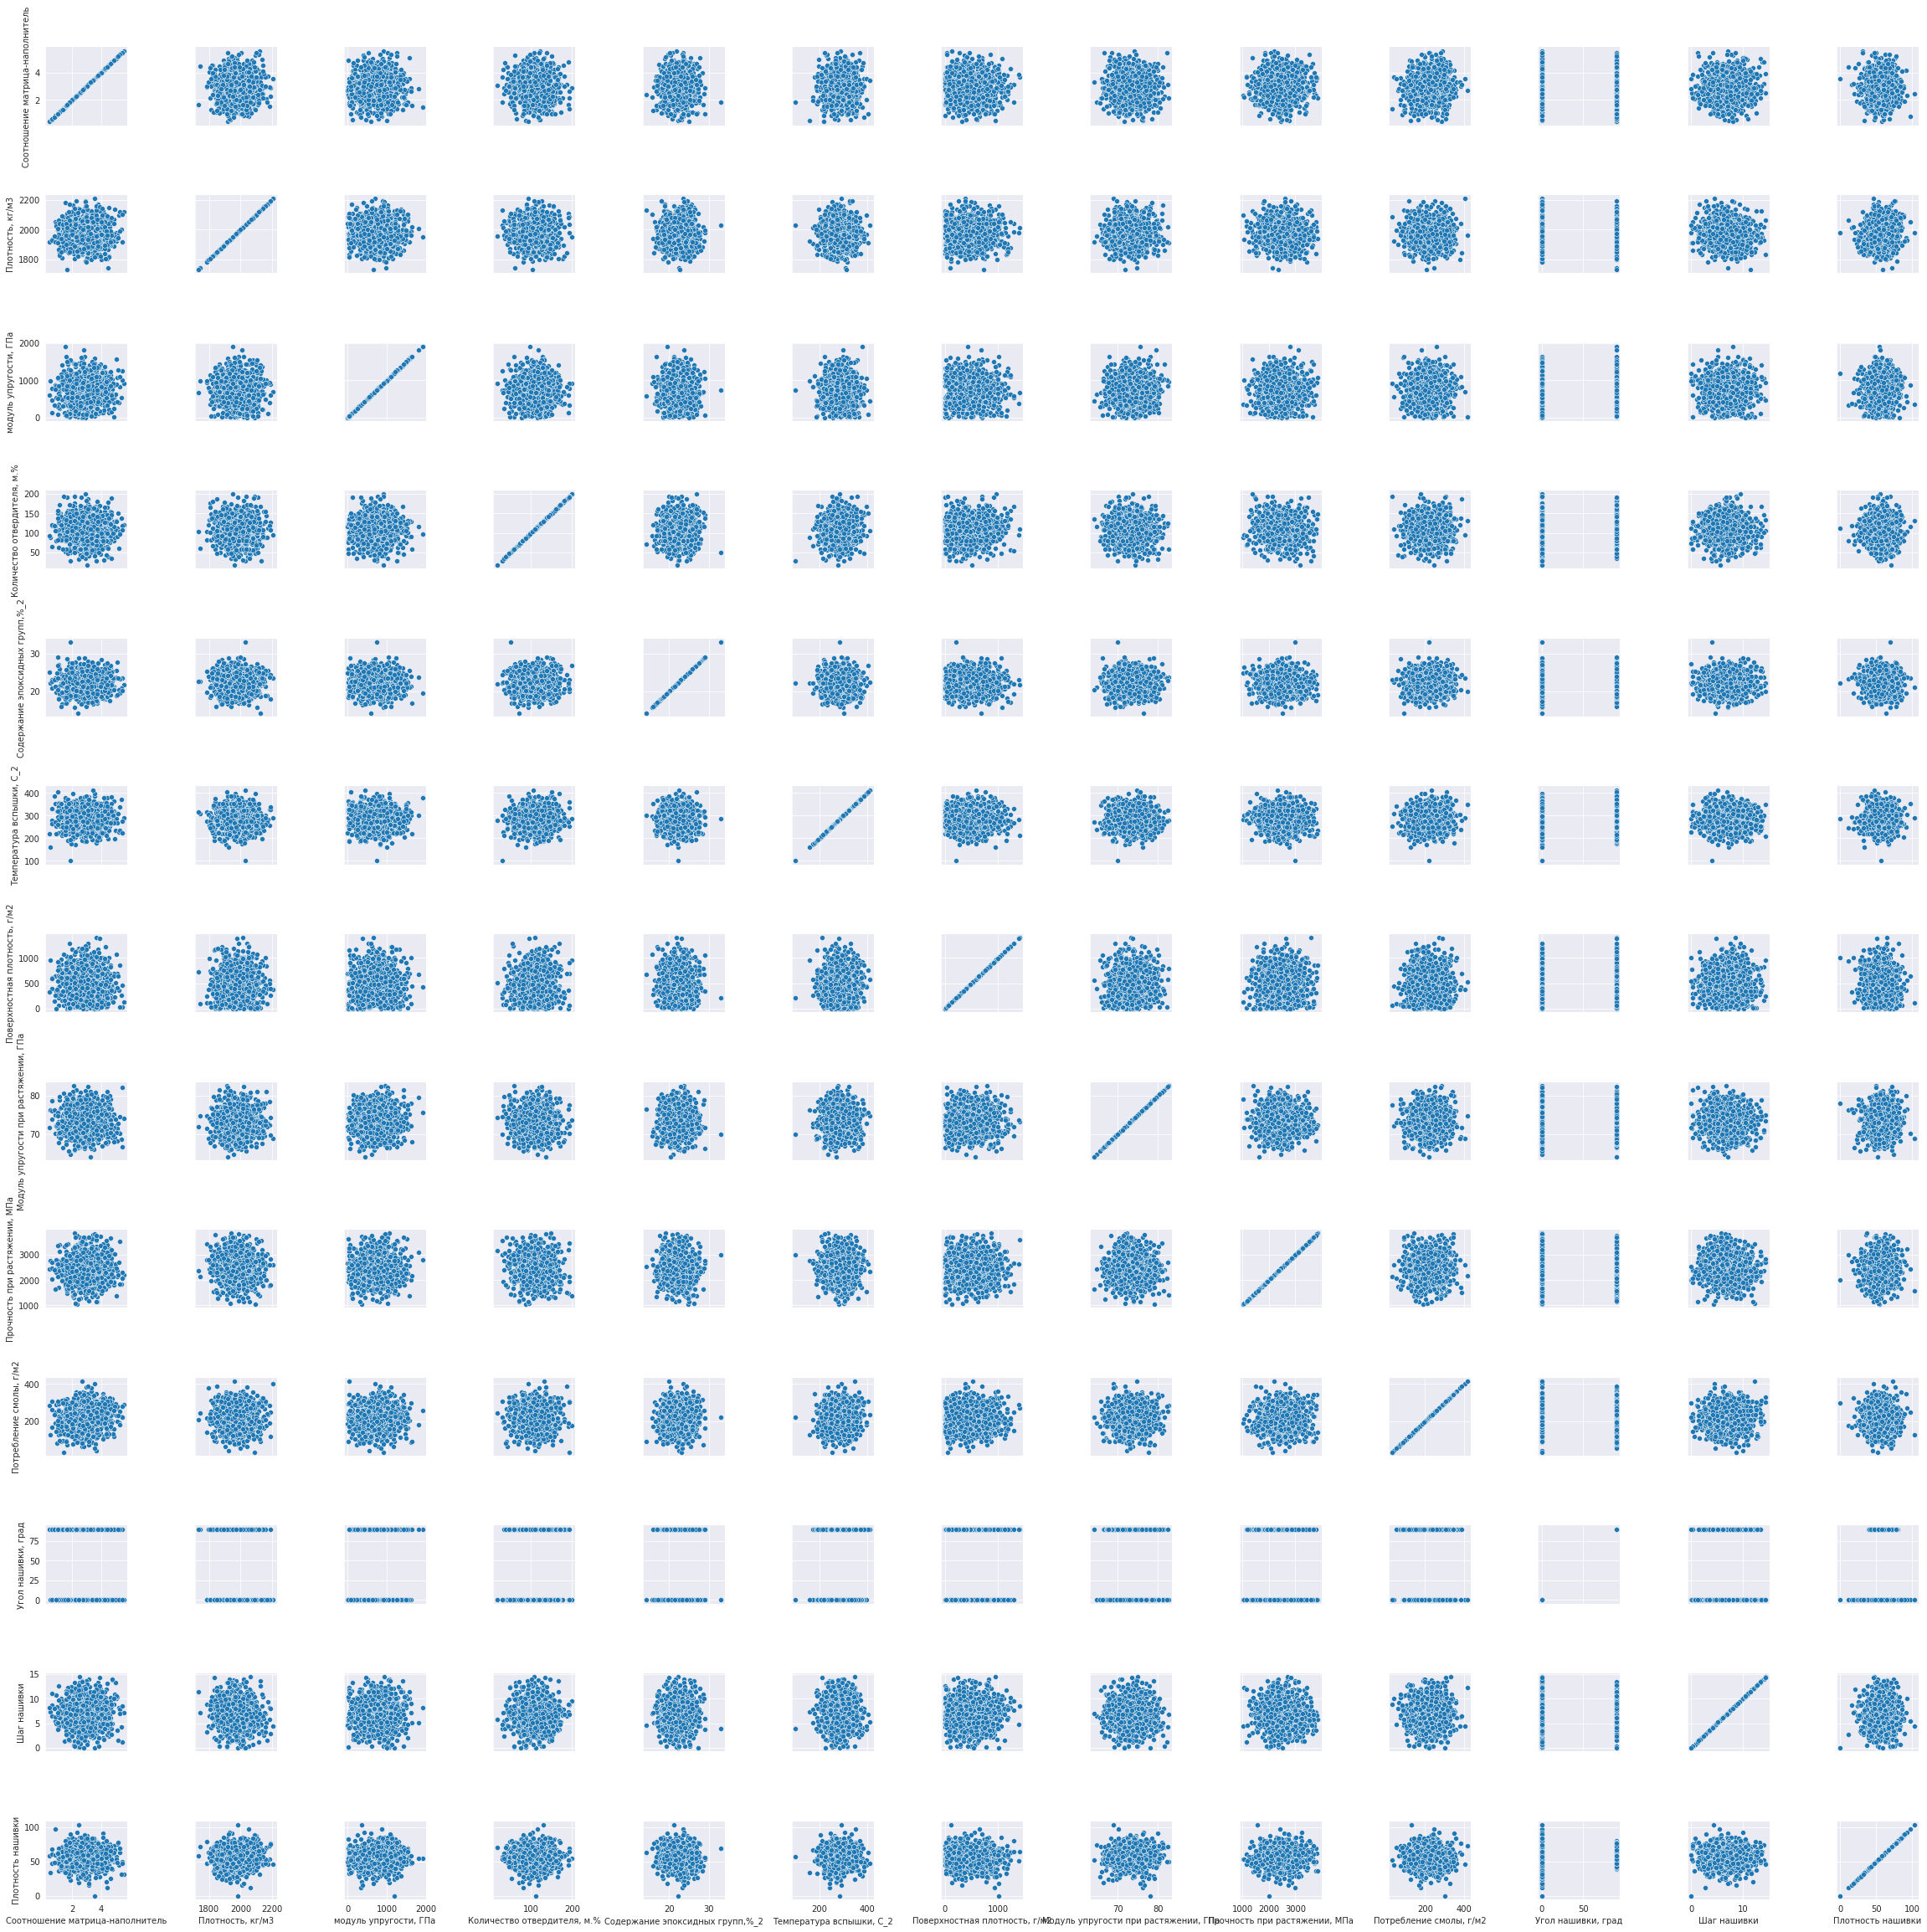

In [10]:
# строим попарные графики рассеяния точек

cols = df.columns
graf = sns.PairGrid(df[cols])
graf.map(sns.scatterplot)


In [11]:
#По всем столбцам, для которых есть выбросы, сделаем замену выбрасов на пустые значения
for x in df.columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x]<min,x] = np.nan
    df.loc[df[x]>max,x] = np.nan

In [12]:
# Посчитаем количество выбросов по каждой строке
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [13]:
# удаляем строки с выбросами
df_mod = df.dropna(axis=0)
df_mod.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [15]:
# Данные до нормализации
df_mod.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          2.925683       1974.040023   
std                           0.893712         70.808120   
min                           0.547391       1784.482245   
25%                           2.321931       1923.443748   
50%                           2.904731       1977.258043   
75%                           3.546650       2020.158764   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean              738.247627                   110.916216   
std               328.708665                    27.037891   
min                 2.436909                    38.668500   
25%               498.577158                    92.523816   
50%               738.736842                   111.113175   
75%               958.418993                   130.001450   
max              1649.415706                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                         22.209030                286.040414   
std                           2.394871                 39.400677   
min                          15.695894                179.374391   
25%                          20.571516                259.184486   
50%                          22.184713                286.024118   
75%                          23.961818                312.991425   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                      482.993901                             73.305127   
std                       280.190377                              3.037381   
min                         0.603740                             65.553336   
25%                       266.004099                             71.248823   
50%                       457.732246                             73.259230   
75%                       695.900862                             75.310788   
max                      1291.340115                             81.417126   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     936.000000               936.000000   
mean                     2467.488822               217.613374   
std                       463.838911                57.827255   
min                      1250.392802                63.685698   
25%                      2146.936034               179.489091   
50%                      2457.959767               218.388715   
75%                      2755.169485               256.396777   
max                      3705.672523               359.052220   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          936.000000   936.000000         936.000000  
mean            46.057692     6.915585          57.451895  
std             45.011619     2.509672          11.239331  
min              0.000000     0.037639          27.272928  
25%              0.000000     5.134988          50.209656  
50%             90.000000     6.943337          57.584225  
75%             90.000000     8.591450          64.798211  
max             90.000000    13.732404          86.012427

In [16]:
df_modc = df_mod.copy()

In [17]:
# Нормализуем данные
from sklearn import preprocessing
minmaxscalar = preprocessing.MinMaxScaler()
col = df_mod.columns
result = minmaxscalar.fit_transform(df_mod)
normresult = pd.DataFrame(result, columns=col)

In [20]:
normresult_c = normresult.copy()

In [82]:
normresult_cc = normresult.copy()

Соотношение матрица-наполнитель


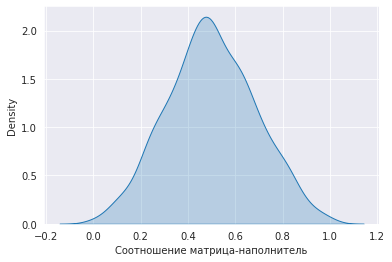

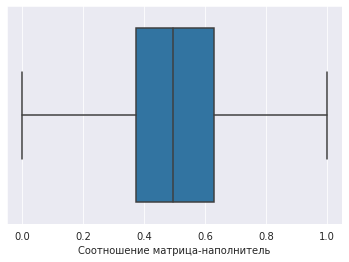

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.4989334532783841
Медианное значение:  0.4945378642781919
Плотность, кг/м3


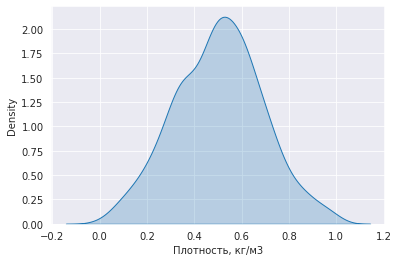

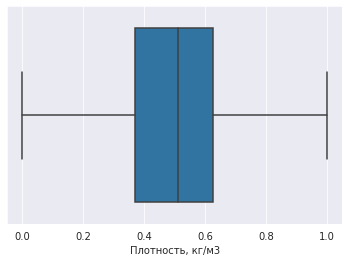

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.5026951430480217
Медианное значение:  0.5112291255243857
модуль упругости, ГПа


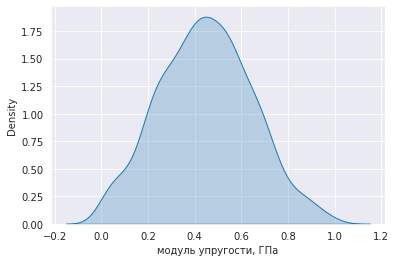

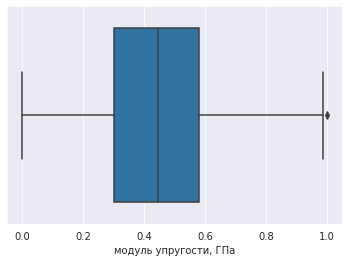

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.4467639287723078
Медианное значение:  0.4470609668067585
Количество отвердителя, м.%


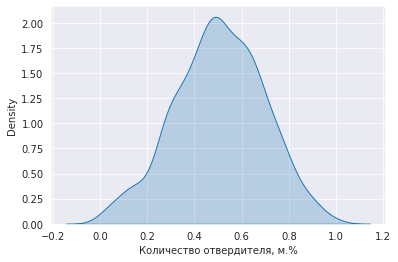

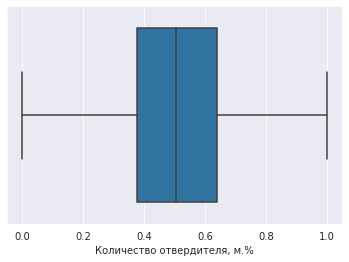

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.5046643049104936
Медианное значение:  0.506040103921319
Содержание эпоксидных групп,%_2


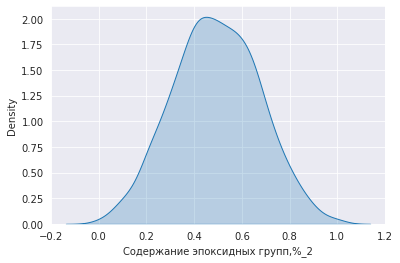

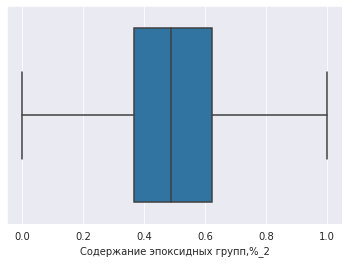

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.49121639211734275
Медианное значение:  0.48938234953251747
Температура вспышки, С_2


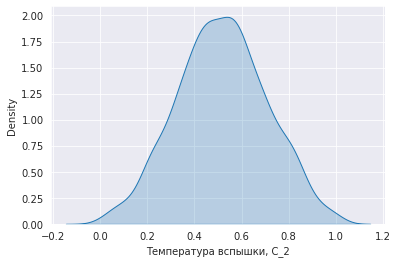

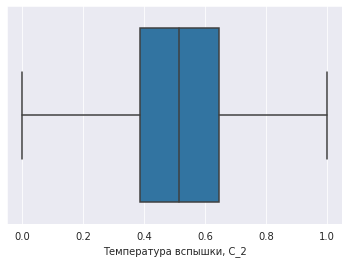

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.5160586620317515
Медианное значение:  0.51597981723048
Поверхностная плотность, г/м2


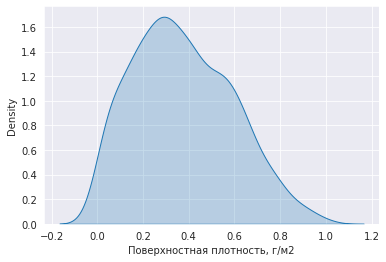

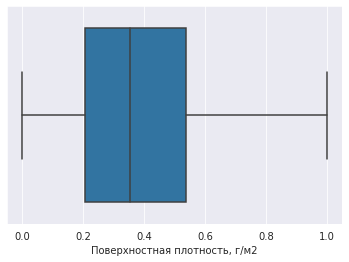

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.37373252272320767
Медианное значение:  0.35416101601621897
Модуль упругости при растяжении, ГПа


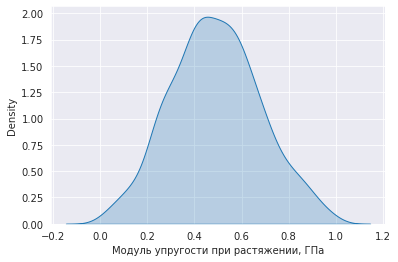

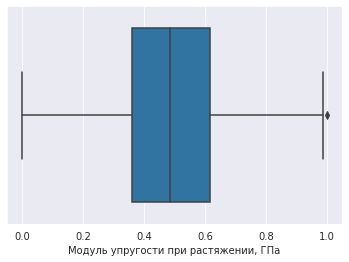

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.488646828451499
Медианное значение:  0.48575363608243993
Прочность при растяжении, МПа


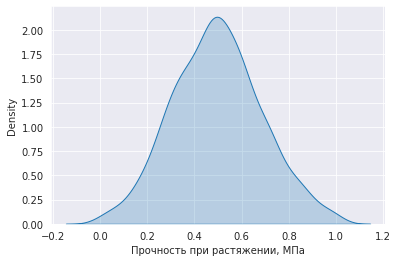

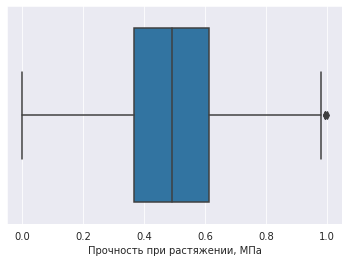

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.4957056458046618
Медианное значение:  0.4918245993404944
Потребление смолы, г/м2


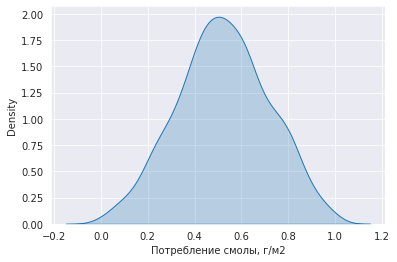

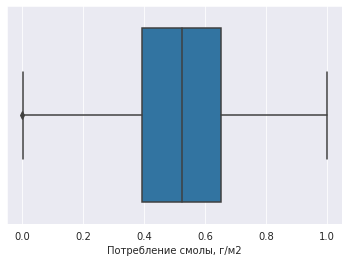

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.5211412421060688
Медианное значение:  0.5237662535716787
Угол нашивки, град


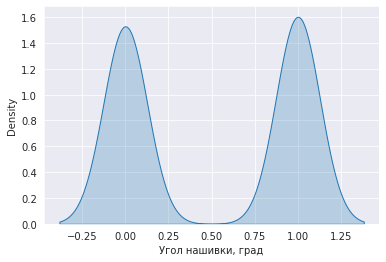

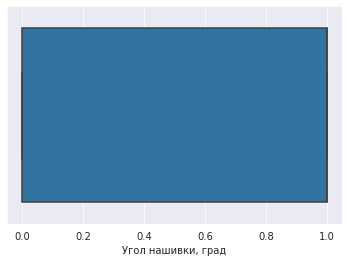

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.5117521367521367
Медианное значение:  1.0
Шаг нашивки


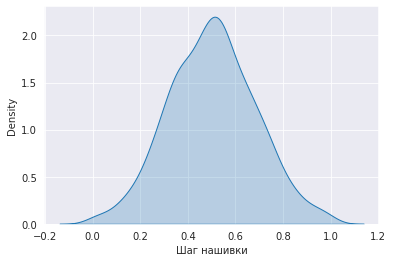

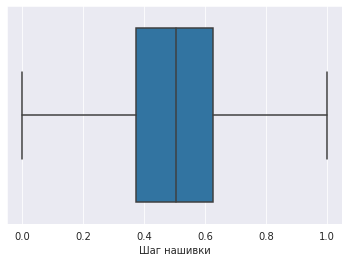

Минимальное значение:  0.0
Максимальное значение:  0.9999999999999999
Среднее значение:  0.5022317234814007
Медианное значение:  0.5042582109139593
Плотность нашивки


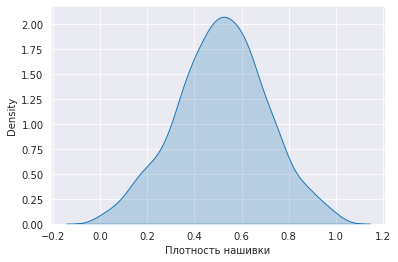

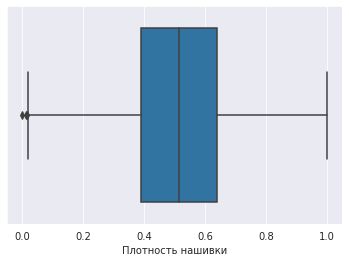

Минимальное значение:  0.0
Максимальное значение:  1.0
Среднее значение:  0.513776377544281
Медианное значение:  0.5160292051115383


In [21]:
#Построим диаграммы и определим средние значения для обработанных и нормализованных данных
for colname in df.columns:
    print(colname)
    #Гистограмма распределения
    sub_data_mm = normresult[colname]
    sns.set_style("darkgrid")
    sns.kdeplot(data=sub_data_mm,shade=True, palette='colorblind')
    plt.show()
    #Диаграмма "Ящик с усами"
    sns.boxplot(x=sub_data_mm);
    plt.show()
    #Минимальное значение
    print("Минимальное значение: ", end=" ")
    print(np.min(sub_data_mm))
    #Среднее значение
    print("Максимальное значение: ", end=" ")
    print(np.max(sub_data_mm))
    #Среднее значение
    print("Среднее значение: ", end=" ")
    print(np.mean(sub_data_mm))
    #Медианное значение
    print("Медианное значение: ", end=" ")
    print(np.median(sub_data_mm))
    

In [ ]:
#Определение корреляции между параметрами
normresult[df.columns].corr()

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                              1.000000   
Плотность, кг/м3                                             0.001676   
модуль упругости, ГПа                                        0.043888   
Количество отвердителя, м.%                                  0.007812   
Содержание эпоксидных групп,%_2                              0.027587   
Температура вспышки, С_2                                    -0.006275   
Поверхностная плотность, г/м2                                0.007540   
Модуль упругости при растяжении, ГПа                        -0.019248   
Прочность при растяжении, МПа                                0.024488   
Потребление смолы, г/м2                                      0.075740   
Угол нашивки, град                                          -0.035897   
Шаг нашивки                                                  0.039109   
Плотность нашивки                                            0.052466   

                                      Плотность, кг/м3  модуль упругости, ГПа  \
Соотношение матрица-наполнитель               0.001676               0.043888   
Плотность, кг/м3                              1.000000               0.004326   
модуль упругости, ГПа                         0.004326               1.000000   
Количество отвердителя, м.%                  -0.050210               0.036523   
Содержание эпоксидных групп,%_2              -0.001065              -0.013271   
Температура вспышки, С_2                     -0.023507               0.029318   
Поверхностная плотность, г/м2                 0.062705              -0.008987   
Модуль упругости при растяжении, ГПа         -0.021316               0.021086   
Прочность при растяжении, МПа                -0.076305               0.036641   
Потребление смолы, г/м2                      -0.005133               0.004450   
Угол нашивки, град                           -0.051336              -0.021886   
Шаг нашивки                                  -0.045229               0.011345   
Плотность нашивки                             0.084077               0.078091   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                          0.007812   
Плотность, кг/м3                                        -0.050210   
модуль упругости, ГПа                                    0.036523   
Количество отвердителя, м.%                              1.000000   
Содержание эпоксидных групп,%_2                          0.011330   
Температура вспышки, С_2                                 0.072273   
Поверхностная плотность, г/м2                            0.046211   
Модуль упругости при растяжении, ГПа                    -0.048208   
Прочность при растяжении, МПа                           -0.063256   
Потребление смолы, г/м2                                 -0.002268   
Угол нашивки, град                                       0.026539   
Шаг нашивки                                             -0.021198   
Плотность нашивки                                        0.001485   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                              0.027587   
Плотность, кг/м3                                            -0.001065   
модуль упругости, ГПа                                       -0.013271   
Количество отвердителя, м.%                                  0.011330   
Содержание эпоксидных групп,%_2                              1.000000   
Температура вспышки, С_2                                    -0.019085   
Поверхностная плотность, г/м2                               -0.013065   
Модуль упругости при растяжении, ГПа                         0.055271   
Прочность при растяжении, МПа                               -0.007097   
Потребление смолы, г/м2                                      0.011575   
Угол нашивки, град                                           0.026645   
Шаг нашивки                          

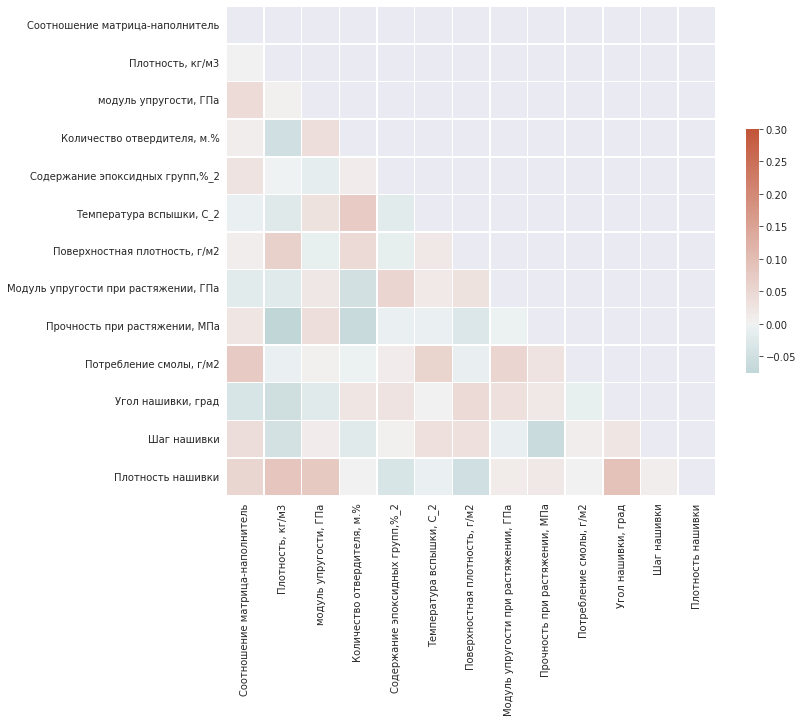

In [22]:
# Визуализируем данные корреляции
normresult_c = df_mod.corr()

mask = np.triu(np.ones_like(normresult_c, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette (200, 20, as_cmap=True)
sns.heatmap(normresult_c, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})



# Прочность при растяжении

In [23]:
#Импортируем библиотеки для построения моделей
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [24]:
#Отделяем выходные переменные и входные
#Сперва проверим модели для прогнозирования прочности на растяжение
strength_out = ["Прочность при растяжении, МПа"]
strength_in = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град", "Шаг нашивки","Плотность нашивки"]
#Выходные
trg = normresult[strength_out]
#Входные
trn = normresult[strength_in]

In [27]:
#Подготовка обучающей и тестовой выборок (соотношение 70 на 30)
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.3)

In [28]:
#Зададим сетку параметров, по которым будем оптимизировать модель
mod0 = {'weights': ['uniform', 'distance'],
               'n_neighbors': list(np.linspace(5, 100, 10, dtype = int)),
               'algorithm': ['auto', 'ball_tree','kd_tree', 'brute'],
               'leaf_size': list(np.linspace(10, 100, 10, dtype = int))}
#В качестве первой модели будем использовать метод ближайших соседей
KNR1 = KNeighborsRegressor()

In [29]:
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
#Количество блоков для перекрестной проверки cv = 10
mod1 = GridSearchCV(estimator = KNR1, scoring = 'r2', param_grid = mod0, cv = 10, verbose= 1, n_jobs = -1)
mod1.fit(Xtrn,Ytrn)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'n_neighbors': [5, 15, 26, 36, 47, 57, 68, 78, 89,
                                         100],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [30]:
best_estimator = mod1.best_estimator_
#Выводим гиперпараметры для оптимальной модели
print(best_estimator)
#выводим точность оптимального трейнера
print(mod1.best_score_)

KNeighborsRegressor(leaf_size=10, n_neighbors=100)
-0.02138133301419687


In [31]:
#Определяем функцию для вычисления точности модели. На входе модель, а также входные параметры и целевая переменная
def evaluate(model, test_features, test_labels):
    #Делаем предсказание на основе входных параметров
    predictions = model.predict(test_features)
    #Считаем абсолютные ошибки в предсказаниях (разность между предсказанным значением и целевым значением)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    #Определяем точность модели
    accuracy = 100 - mape
    print('Средняя абсолютная ошибка: {:0.4f}'.format(np.mean(errors.values)))
    #print('Точность = {:0.2f}%.'.format(accuracy[0]))
    return accuracy

In [32]:
#Подставляем оптимальные гиперпараметры в модель
model1 = KNeighborsRegressor(algorithm='brute', leaf_size=10, n_neighbors=100, weights='distance')
#Обучаем модель
model1.fit(Xtrn,Ytrn)
#Оцениваем точность на тренировочном наборе
base_accuracy = evaluate(model1, Xtrn,Ytrn)
#Оцениваем точность на тестовом наборе
base_accuracy = evaluate(model1, Xtest,Ytest)

Средняя абсолютная ошибка: 0.0000
Средняя абсолютная ошибка: 0.1445


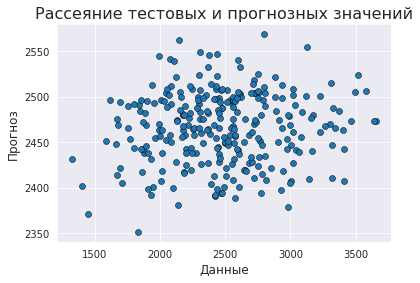

Данные      Прогноз
0    1991.478742  2463.232536
1    2655.460863  2419.541060
2    2203.581132  2442.272086
3    2498.894803  2449.239354
4    2770.622771  2394.324470
..           ...          ...
276  1590.786556  2451.394109
277  1694.488100  2420.945188
278  2233.658709  2482.428820
279  2925.799730  2396.807537
280  1911.162088  2398.396545

[281 rows x 2 columns]

In [124]:
#Спрогнозированные данные
predict1 = model1.predict(Xtest)
predict1_values = np.ravel(predict1)
#Тестовые данные
tv1 = Ytest.copy()
test1_values = np.ravel(tv1)
#Преобразуем нормализованные данные к исходным
col1 = ["Прочность при растяжении, МПа"]
#Определим параметры, которые использовались для нормализации
min_1 = np.min(df_mod[col1])
max_1 = np.max(df_mod[col1])
#Сделаем преобразование, обратное нормализации (для нормализации использовался MinMaxScaler от 0 до 1)
i = 0
while i < len(predict1_values):
    predict1_values[i] = predict1_values[i]*(max_1 - min_1) + min_1
    test1_values[i] = test1_values[i]*(max_1 - min_1) + min_1
    i += 1
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': test1_values,'Прогноз': predict1_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results

In [34]:
#Зададим сетку параметров, по которым будем оптимизировать модель (вторая модель)
mod2 = {'n_estimators': list(np.linspace(100, 500, 5, dtype = int)),
             'loss': ['ls', 'lad', 'huber'],
             'max_depth': [2, 3, 5, 10, 15]}
#В качестве второй модели будем использовать метод градиентного бустинга
GBR1 = GradientBoostingRegressor()

In [35]:
Xtrn2, Xtest2, Ytrn2, Ytest2 = train_test_split(trn, trg, test_size=0.3)

In [36]:
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
#Количество блоков для перекрестной проверки cv = 10
model2 = GridSearchCV(estimator = GBR1, scoring = 'r2', param_grid = mod2, cv = 10, verbose= 1, n_jobs = -1)
model2.fit(Xtrn2,np.ravel(Ytrn2))
#Используем преобразование np.ravel() массива [[],[],...] к одномерному массиву [,,...]

Fitting 10 folds for each of 75 candidates, totalling 750 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'loss': ['ls', 'lad', 'huber'],
                         'max_depth': [2, 3, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='r2', verbose=1)

In [37]:
best_estimator = model2.best_estimator_
#Выводим гиперпараметры для оптимальной модели
print(best_estimator)
#выводим точность оптимального трейнера
print(model2.best_score_)

GradientBoostingRegressor(loss='lad', max_depth=2)
-0.07005601224686674


In [38]:
#Определяем функцию для вычисления точности модели. На входе модель, а также входные параметры и целевая переменная
def evaluate2(model, test_features, test_labels):
    #Делаем предсказание на основе входных параметров
    predictions = model.predict(test_features)
    #Преобразуем к виду [[],[],...] из одномерного массива
    predict = np.reshape(predictions,(predictions.size, 1))
    #Считаем абсолютные ошибки в предсказаниях (разность между предсказанным значением и целевым значением)
    errors = abs(predict - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    #Определяем точность модели
    accuracy = 100 - mape
    print('Средняя абсолютная ошибка: {:0.4f}'.format(np.mean(errors.values)))
    #print('Точность = {:0.2f}%.'.format(accuracy[0]))
    return accuracy
 

In [39]:
#Подставляем оптимальные гиперпараметры в модель
model2 = GradientBoostingRegressor(loss='lad', max_depth=2)
#Обучаем модель
model2.fit(Xtrn2,np.ravel(Ytrn2))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(loss='lad', max_depth=2)

In [40]:
#Оцениваем точность на тренировочном наборе
base_accuracy = evaluate2(model2, Xtrn2, Ytrn2)
#Оцениваем точность на тестовом наборе
base_accuracy = evaluate2(model2, Xtest2, Ytest2)

Средняя абсолютная ошибка: 0.1355
Средняя абсолютная ошибка: 0.1531


In [41]:
#Важность папаметров в модели
importances = model2.feature_importances_
#получаем названия колонок параметров
feature_list = list(Xtrn2.columns)
#Формируем таблицу для представления
feature_results = pd.DataFrame({'Параметр': feature_list,'Важность параметра': importances})
#Сортируем по уменьшению важности
feature_results = feature_results.sort_values('Важность параметра',ascending = False).reset_index(drop=True)


In [42]:
feature_results

Параметр  Важность параметра
0         Температура вспышки, С_2            0.223167
1            модуль упругости, ГПа            0.202607
2      Количество отвердителя, м.%            0.142351
3          Потребление смолы, г/м2            0.090185
4                 Плотность, кг/м3            0.084143
5    Поверхностная плотность, г/м2            0.083793
6                      Шаг нашивки            0.072212
7                Плотность нашивки            0.055898
8  Содержание эпоксидных групп,%_2            0.045643
9               Угол нашивки, град            0.000000

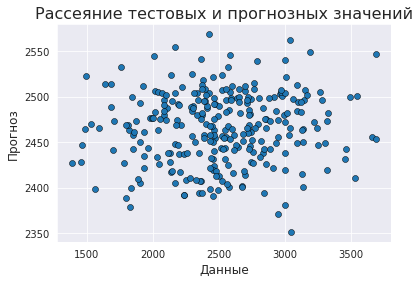

Данные      Прогноз
0    1817.644854  2463.232536
1    3323.638821  2419.541060
2    2890.615776  2442.272086
3    3305.286922  2449.239354
4    2347.684613  2394.324470
..           ...          ...
276  2683.718348  2451.394109
277  1930.684450  2420.945188
278  3015.926352  2482.428820
279  2498.544649  2396.807537
280  1564.394256  2398.396545

[281 rows x 2 columns]

In [43]:
#Спрогнозированные данные
predict2 = model2.predict(Xtest2)
predict2_values = np.ravel(predict2)
#Тестовые данные
tv2 = Ytest2.copy()
test2_values = np.ravel(tv2)
#Преобразуем нормализованные данные к исходным
col2 = ["Прочность при растяжении, МПа"]
#Определим параметры, которые использовались для нормализации
min2 = np.min(df_mod[col2])
max2 = np.max(df_mod[col2])
#Сделаем преобразование, обратное нормализации (для нормализации использовался MinMaxScaler от 0 до 1)
i = 0
while i < len(predict2_values):
    predict2_values[i] = predict2_values[i]*(max2 - min2) + min2
    test2_values[i] = test2_values[i]*(max2 - min2) + min2
    i += 1
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': test2_values,'Прогноз': predict1_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results

# Модуль упругости

In [44]:
#Отделяем выходные переменные и входные
#Теперь проверим модели для прогнозирования Модуль упругости при растяжении, ГПа
#убираем угол нашивки
module_out = ["Модуль упругости при растяжении, ГПа"]
module_in = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Шаг нашивки","Плотность нашивки"]
#Выходные
trg2 = normresult[module_out]
#Входные
trn2 = normresult[module_in]

In [45]:
Xtrn3, Xtest3, Ytrn3, Ytest3 = train_test_split(trn2, trg2, test_size=0.3)


In [46]:
#Зададим сетку параметров, по которым будем оптимизировать модель
mod3 = {'fit_intercept': [True, False],
               'positive': [True, False]}
#В качестве первой модели будем использовать метод ближайших соседей
LR1 = LinearRegression()

In [47]:
#Запустим обучение модели. В качестве оценки модели будем использовать коэффициент детерминации (R^2)
#Количество блоков для перекрестной проверки cv = 10
model3 = GridSearchCV(estimator = LR1, scoring = 'r2', param_grid = mod3, cv = 10, verbose= 1, n_jobs = -1)
model3.fit(Xtrn3,Ytrn3)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='r2', verbose=1)

In [48]:
best_estimator = model3.best_estimator_
#Выводим гиперпараметры для оптимальной модели
print(best_estimator)
#выводим точность оптимального трейнера
print(model3.best_score_)

LinearRegression(positive=True)
-0.026239038795384327


In [49]:
#Подставляем оптимальные гиперпараметры в модель
model3 = LinearRegression(positive=True)
#Обучаем модель
model3.fit(Xtrn3,Ytrn3)

LinearRegression(positive=True)

In [50]:
#Оцениваем точность на тренировочном наборе
base_accuracy = evaluate(model3, Xtrn3, Ytrn3)
#Оцениваем точность на тестовом наборе
base_accuracy = evaluate(model3, Xtest3, Ytest3)

Средняя абсолютная ошибка: 0.1520
Средняя абсолютная ошибка: 0.1569


In [51]:
#Важность папаметров в модели
importances = np.ravel(model3.coef_)
#получаем названия колонок параметров
feature_list = list(Xtrn3.columns)
#Формируем таблицу для представления
feature_results = pd.DataFrame({'Параметр': feature_list,'Важность параметра': importances})
#Сортируем по уменьшению важности
feature_results = feature_results.sort_values('Важность параметра',ascending = False).reset_index(drop=True)

In [52]:
feature_results

Параметр  Важность параметра
0  Содержание эпоксидных групп,%_2            0.065886
1          Потребление смолы, г/м2            0.044089
2         Температура вспышки, С_2            0.038810
3    Поверхностная плотность, г/м2            0.016721
4                Плотность нашивки            0.002560
5                 Плотность, кг/м3            0.000000
6            модуль упругости, ГПа            0.000000
7      Количество отвердителя, м.%            0.000000
8                      Шаг нашивки            0.000000

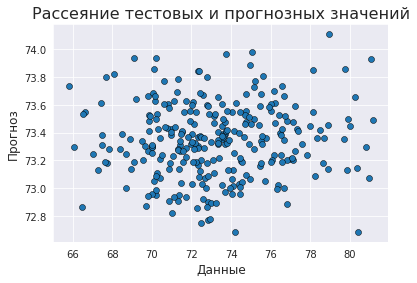

Данные    Прогноз
0    71.617030  73.545713
1    74.737493  73.556983
2    72.429467  73.121287
3    72.558812  73.667380
4    78.500822  73.419730
..         ...        ...
276  70.673985  73.440143
277  78.895826  73.134630
278  71.187554  73.437885
279  75.566258  73.375177
280  72.794143  73.800006

[281 rows x 2 columns]

In [53]:
#Спрогнозированные данные
predict3 = model3.predict(Xtest3)
predict3_values = np.ravel(predict3)
#Тестовые данные
tv3 = Ytest3.copy()
test3_values = np.ravel(tv3)
#Преобразуем нормализованные данные к исходным
col3 = ["Модуль упругости при растяжении, ГПа"]
#Определим параметры, которые использовались для нормализации
min_3 = np.min(df_mod[col3])
max_3 = np.max(df_mod[col3])
#Сделаем преобразование, обратное нормализации (для нормализации использовался MinMaxScaler от 0 до 1)
i = 0
while i < len(predict3_values):
    predict3_values[i] = predict3_values[i]*(max_3 - min_3) + min_3
    test3_values[i] = test3_values[i]*(max_3 - min_3) + min_3
    i += 1
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': test3_values,'Прогноз': predict3_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results

# нейронная сеть

In [105]:
#Разделим данные на параметры и целевые значения
#Отделяем выходные переменные и входные
#Теперь проверим модели для прогнозирования Модуль упругости при растяжении, ГПа
colnames_out_n = ["Соотношение матрица-наполнитель"]
colnames_in_n = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град","Шаг нашивки","Плотность нашивки"]
#Выходные
trgn = normresult[colnames_out_n]
#Входные
trnn = normresult[colnames_in_n]

In [106]:
#Переформатируем данные в массив
trgn_data = trgn.values
trnn_data = trnn.values
trgn_data = np.ravel(trgn_data)

In [ ]:
trgn_data

In [ ]:
trnn_data

In [109]:
#Разобьем на тестовую и обучающую выборки
Xtrnn, Xtestn, Ytrnn, Ytestn = train_test_split(trnn_data, trgn_data, test_size=0.3)

In [ ]:
pip install tensorflow

In [111]:
#Импорт TensorFlow
import tensorflow as tf

In [112]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [113]:
#Объявляем плейсхолдеры
X = tf.placeholder(dtype=tf.float32, shape=[None, 10])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [114]:
#Инициализаторы
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [115]:
#Параметры архитектуры модели
n_start = 10
n_neurons_1 = 32
n_neurons_2 = 16
n_neurons_3 = 8
n_neurons_4 = 4
n_target = 1
#Уровень 1: Переменные для скрытых весов и смещений
W_hidden_1 = tf.Variable(weight_initializer([n_start, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
#Уровень 2: Переменные для скрытых весов и смещений
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
#Уровень 3: Переменные для скрытых весов и смещений
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
#Уровень 4: Переменные для скрытых весов и смещений
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

In [116]:
#Уровень выходных данных: Переменные для скрытых весов и смещений
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [117]:
#Скрытый уровень
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

#Выходной уровень (должен быть транспонирован)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [118]:
#Функция стоимости
mse = tf.reduce_mean(tf.squared_difference(out, Y))
#Оптимизатор
opt = tf.train.AdamOptimizer().minimize(mse)

In [119]:
#Создание сессии
netn2 = tf.Session()
#Запуск инициализатора
netn2.run(tf.global_variables_initializer())

#Количество эпох и размер куска данных
epochs = 100
batch_size = 50

for e in range(epochs):

    #Перемешивание данных для обучения
    shuffle_indices = np.random.permutation(np.arange(len(Ytrnn)))
    Xtrnn = Xtrnn[shuffle_indices]
    Ytrnn = Ytrnn[shuffle_indices]

    #Обучение мини-партией
    for i in range(0, len(Ytrnn) // batch_size):
        start = i * batch_size
        batch_x = Xtrnn[start:start + batch_size]
        batch_y = Ytrnn[start:start + batch_size]
        netn2.run(opt, feed_dict={X: batch_x, Y: batch_y})

        #Показать прогресс
        if np.mod(i, 5) == 0:
            # Prediction
            pred = netn2.run(out, feed_dict={X: Xtestn})
#Вывести финальную фукнцию MSE после обучения
mse_final = netn2.run(mse, feed_dict={X: Xtestn, Y: Ytestn})
print(mse_final)

0.03161662


In [120]:
pred1 = netn2.run(out, feed_dict={X: Xtestn})

In [121]:
predict = np.reshape(pred1,(pred1.size, 1))
errors = abs(predict - Ytestn)
mape = 100 * np.mean(errors / Ytestn)
#Определяем точность модели
accuracy = 100 - mape
print('Средняя абсолютная ошибка: {:0.4f}'.format(np.mean(errors)))
#print('Точность = {:0.2f}%.'.format(accuracy))

Средняя абсолютная ошибка: 0.1415


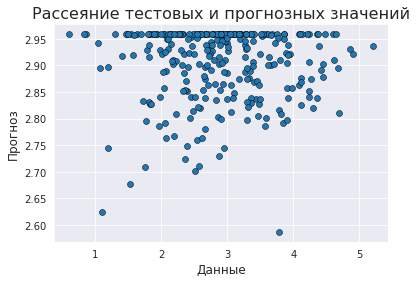

Данные   Прогноз
0    2.584119  2.819452
1    1.626946  2.958369
2    4.414161  2.891201
3    3.524311  2.955250
4    3.272840  2.888244
..        ...       ...
276  2.048910  2.924891
277  2.546782  2.958369
278  2.571758  2.711589
279  3.395715  2.898383
280  1.193530  2.744284

[281 rows x 2 columns]

In [123]:
#Спрогнозированные данные
predict_nn = netn2.run(out, feed_dict={X: Xtestn})
predict_nn_values = predict_nn[0]
#Тестовые данные
tv_nn = Ytestn.copy()
test_nn_values = np.ravel(tv_nn)
#Преобразуем нормализованные данные к исходным
col_nn = ["Соотношение матрица-наполнитель"]
#Определим параметры, которые использовались для нормализации
min_nn = np.min(df_mod[col_nn])
max_nn = np.max(df_mod[col_nn])
#Сделаем преобразование, обратное нормализации (для нормализации использовался MinMaxScaler от 0 до 1)
i = 0
while i < len(predict_nn_values):
    predict_nn_values[i] = predict_nn_values[i]*(max_nn - min_nn) + min_nn
    test_nn_values[i] = test_nn_values[i]*(max_nn - min_nn) + min_nn
    i += 1
#Создадим датасет с тестовыми данными и прогнозными значениями
feature_results = pd.DataFrame({'Данные': test_nn_values,'Прогноз': predict_nn_values})
#Выведем график рассеяния. В случае идеального прогноза график походил бы на прямую
sns.set_style('darkgrid')
plt.title('Рассеяние тестовых и прогнозных значений',size=16)
plt.xlabel('Данные',size=12)
plt.ylabel('Прогноз',size=12)
sns.scatterplot(x='Данные', y='Прогноз', data=feature_results, edgecolor='black', palette='cubehelix')
plt.show()
feature_results